In [ ]:
import os
import math
import itertools
CUR_DIR = os.getcwd()
DATA_DIR = CUR_DIR + "/../data/raw/"
FILE_NAME = ["w2_.txt", "w3_.txt", "w4_.txt","w5_.txt"]
TENSOR_DIM = [2,3,4,5]

In [ ]:
def get_word_dic(textFile, n):
    wordDic = {}; index = 1
    f = open(textFile,'r')
    oneline = f.readline()
    while (oneline!=""):
        entry = oneline.split()
        for i in range(n):
            if entry[i+1] not in wordDic:
                wordDic[entry[i+1]] = index
                index += 1
        oneline = f.readline()
    return wordDic

In [ ]:
def get_tensor_dic(textFile, wordDic, n):
    tensorDic = {}
    f = open(textFile,'r')
    oneline = f.readline()
    while(oneline!=""):
        tempList = []
        entry = oneline.split()
        for i in range(n):
            tempList.append(wordDic[ entry[i+1] ])
        tensorDic[tuple(tempList)] = int(entry[0])
        oneline = f.readline()
    return tensorDic

In [ ]:
def get_data_dic(tensorDic, n):
    dataDic = {}
    
    flagDic = {}
    for item in tensorDic:
        flagDic[item] = False
        
    for item in tensorDic:
        if flagDic[item] is True:
            continue
        flagDic[item] = True
        ip = itertools.permutations(item)
        tSum = 0
        for ipItem in ip:
            if ipItem in tensorDic:
                tSum += tensorDic[ipItem]
                flagDic[ipItem] = True
            
        ip = itertools.permutations(item)
        for ipItem in ip:
            dataDic[ipItem] = tSum
    
    return dataDic

In [ ]:
def print_file(textFile, dicFile, dataDic, wordDic, n):
    
    f = open(textFile,'w')
    f.write("# This is the "+str(n)+"-gram data from http://www.ngrams.info/intro.asp\n")
    f.write("# The last column is the tensor value, and other columns are tensor indices\n")
    for item in dataDic:
        tempList = []
        for num in item:
            tempList.append(str(num))
        indStr = '  '.join(tempList)
        f.write(indStr + "  " + str(dataDic[item]) + "\n")
    f.close()
    
    f = open(dicFile,'w')
    f.write("# This is the "+str(n)+"-gram data from http://www.ngrams.info/intro.asp\n")
    f.write("# Each line denotes a word and its corrsponding index\n")
    for item in wordDic:
        f.write(item + "  " + str(wordDic[item]) + "\n")
    f.close()

In [ ]:
def normalize_data(dataDic):
    colDic = {}; flagDic = {}
    for item in dataDic:
        flagDic[item] = False
        key = item[1:]
        if key not in colDic:
            colDic[key] = [item[0]]
        else:
            colDic[key].append(item[0])
    
    for item in dataDic:
        if flagDic[item] is True:
            continue
        key = item[1:]; tSum = 0
        for firstInd in colDic[key]:
            tSum += dataDic[(firstInd,)+key]
        for firstInd in colDic[key]:
            tempKey = (firstInd,)+key
            dataDic[tempKey] = (dataDic[tempKey]+0.00)/tSum
            flagDic[tempKey] = True

In [ ]:
def process_data(i):
    textFile = DATA_DIR + FILE_NAME[i]
    wordDic = get_word_dic(textFile,TENSOR_DIM[i])
    tensorDic = get_tensor_dic(textFile, wordDic, TENSOR_DIM[i])
    dataDic = get_data_dic(tensorDic, TENSOR_DIM[i])
    print_file(DATA_DIR+"raw_tensor_"+FILE_NAME[i], DATA_DIR+"raw_dic_"+FILE_NAME[i], dataDic, wordDic, TENSOR_DIM[i])
    
    normalize_data(dataDic)
    
    print_file(DATA_DIR+"tensor_"+FILE_NAME[i], DATA_DIR+"dic_"+FILE_NAME[i], dataDic, wordDic, TENSOR_DIM[i])

In [ ]:
process_data(0)
process_data(1)
process_data(2)

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

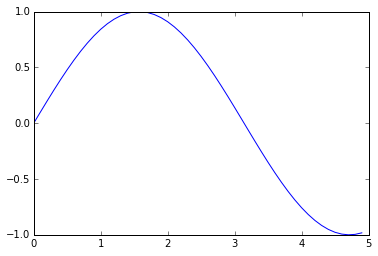

In [2]:
x = np.arange(0, 5, 0.1);
y = np.sin(x)
plt.plot(x, y)